# Linear Regression
## ISLP Applied exercises (Ch3)
Celine Cabás

Import libraries:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

-----
## Task 1

8. This question involves the use of simple linear regression on the Auto data set.

    **(a)** Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the  output. For example:
 
    i. Is there a relationship between the predictor and the response?
 
    ii. How strong is the relationship between the predictor and the response?
 
    iii. Is the relationship between the predictor and the response positive or negative?
 
    iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
 
    **(b)** Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.
 
    **(c)** Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.
----

We load the `Auto` database from `ISLP` package. Features description:

In [5]:
Auto = load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [94]:
y = Auto['mpg']
design = MS(['horsepower'])
X = design.fit_transform(Auto)
y[:4], X[:4]

(name
 chevrolet chevelle malibu    18.0
 buick skylark 320            15.0
 plymouth satellite           18.0
 amc rebel sst                16.0
 Name: mpg, dtype: float64,
                            intercept  horsepower
 name                                            
 chevrolet chevelle malibu        1.0         130
 buick skylark 320                1.0         165
 plymouth satellite               1.0         150
 amc rebel sst                    1.0         150)

We fit a simple linear model with horsepower as the only predictor. Explore the summary of the fit with ISLP function `summarize()`:

In [95]:
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


For a more exhaustive summary of the fit, we use `summary()` method:

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        20:31:34   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**Model output**

Our model above found a significant relation between mpg and horsepower, given a p-value of 0.000 and a high t-statistic. Which confirm us there is a relationship between the predictor and the response. Also, this relationship is fairly high with an Adjusted R-Squared above of 0.60 and is negative with a coefficient equals to -0.1578.

**Confidence intervals and prediction intervals**
We can compute:

(1) Confidence intervals for the expected value, the mean of the response variable conditioned in the predictor's value

(2) Prediction intervals of an exact value of prediction for an individual data point.

First, we estimate the predicted mean:

In [96]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [97]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

Associated 95% Confidence interval for the expected value with `horsepower` value of 98.

In [24]:
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

Associated 95% Prediction interval for the individual predict mean with `horsepower`value 0f 98.

In [25]:
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### Scatter plot

Based on the next graph, there are some evidence of a non-linear relationship between `mpg` and `horsepower`. We should add a polynomial function of the predictor to the model matrix to improve the goodness of fit. In the following we will test this change in the model specification.

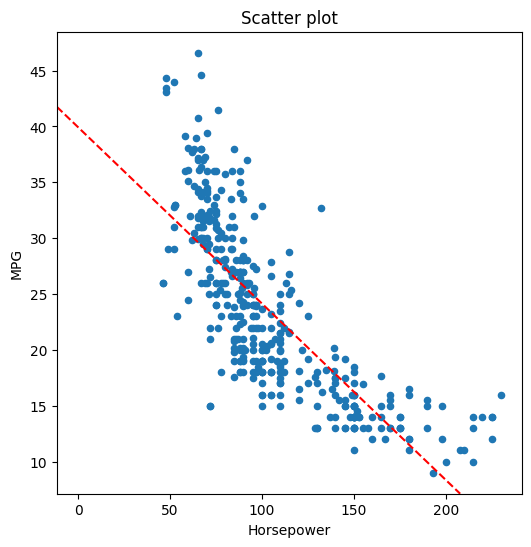

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Auto['horsepower'], Auto['mpg'], s=20)
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.axline((0,results.params.iloc[0]), slope=results.params.iloc[1], ls="--", c="red")
ax.set_title("Scatter plot")
plt.show()

### Diagnostics plots

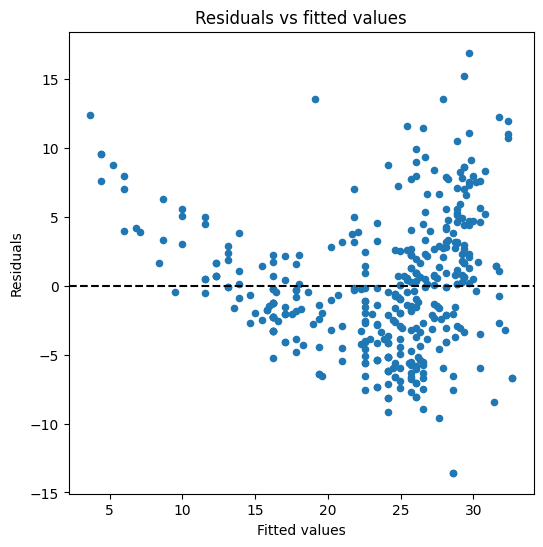

In [88]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(results.fittedvalues, results.resid, s=20)
ax.set_title('Residuals vs fitted values')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
ax.axhline(0, ls="--", c="k")
plt.show()

In [82]:
inf = results.get_influence()

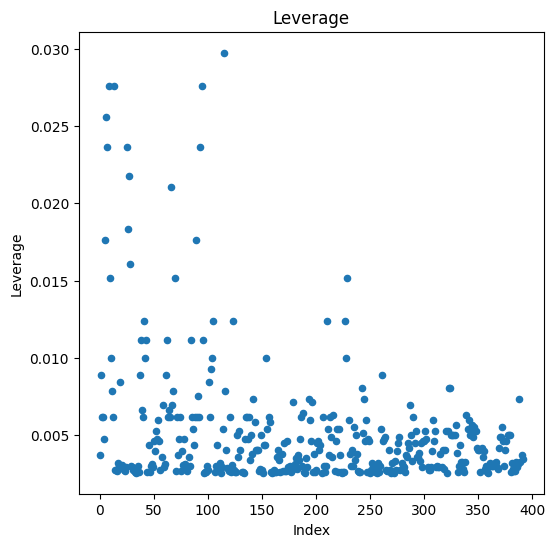

In [119]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(np.arange(X.shape[0]), inf.hat_matrix_diag, s=20)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Leverage')
plt.show()

### Improving fit

The previous model has bad look in diagnostics graphs. We improve it below by adding a polynomial function of `horsepower`:

In [111]:
# Add quadratic term of horsepower in model matrix
design = MS([poly('horsepower', degree=2)])
X = design.fit_transform(Auto)

# Fit the model again
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           5.40e-99
Time:                        00:39:44   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        23.4459      0.221    106.130      0.000      23.012      23.880
poly(horsepower, degree=2)[0]  -120.1377      4.374    -27.467      0.000    -128.737    -111.538
poly(horsepower, degree=2)[1]    44.0895      4.374     10.080      0.000      35.490      52.689
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

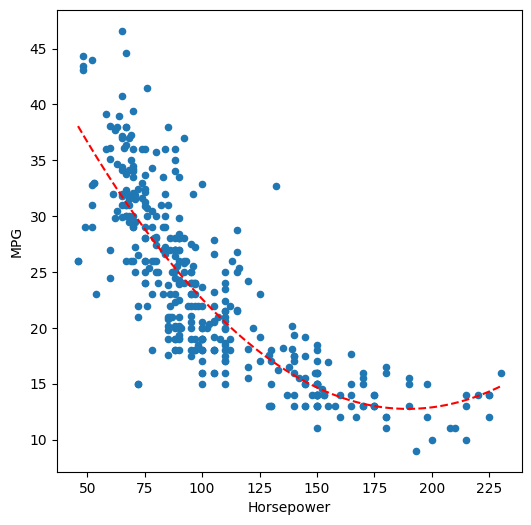

In [118]:
# Range of horsepower's values
new_df = pd.DataFrame({'horsepower':np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100)})
newX = design.transform(new_df)

# Plotting the fitted model
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Auto['horsepower'], Auto['mpg'], s=20)
ax.set_ylabel('MPG')
ax.set_xlabel('Horsepower')
ax.plot(np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100), 
           results.get_prediction(newX).predicted_mean, c="red", ls="--")
plt.show()

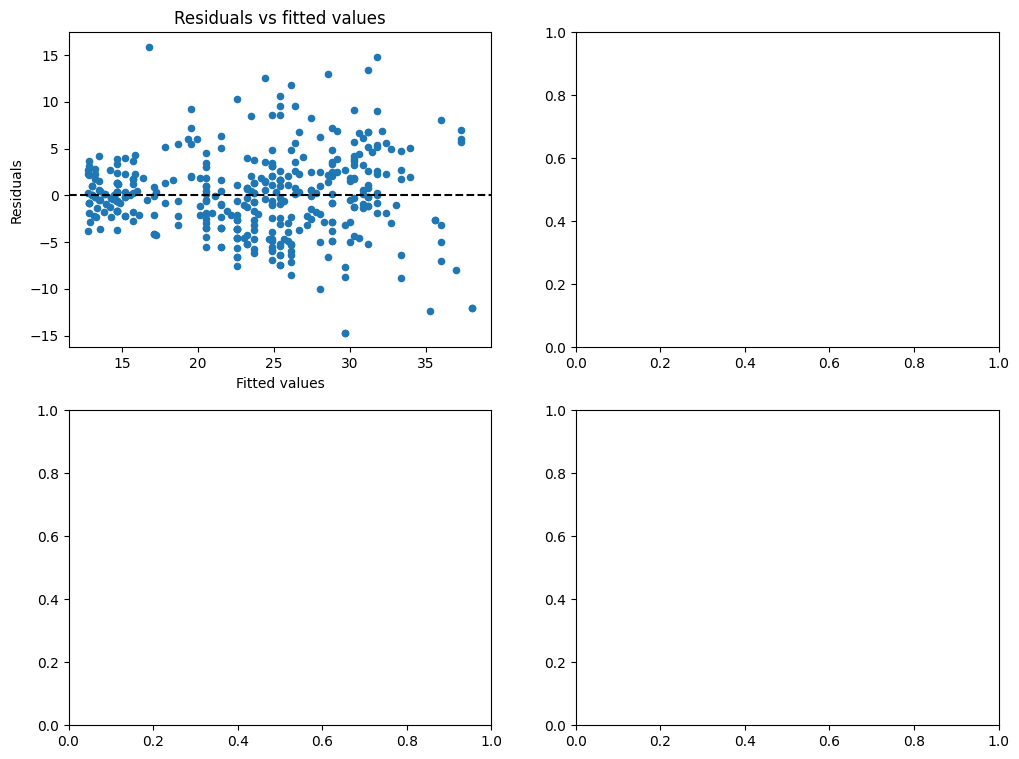

In [128]:
fig, ax = plt.subplots(figsize=(12,9), nrows=2, ncols=2)
ax[0,0].scatter(results.fittedvalues, results.resid, s=20)
ax[0,0].set_title('Residuals vs fitted values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_xlabel('Fitted values')
ax[0,0].axhline(0, ls="--", c="k")

ax[0,1].scatter(

plt.show()


----
## Task 2

9. This question involves the use of multiple linear regression on the Auto data set.
    
    **(a)** Produce a scatterplot matrix which includes all of the variables in the data set.
 
    **(b)** Compute the matrix of correlations between the variables using the DataFrame.corr() method.
 
    **(c)** Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:
 
    i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
  
    ii. Which predictors appear to have a statistically significant relationship to the response?
  
    iii. What does the coefficient for the year variable suggest?
    
    **(d)** Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
 
    **(e)** Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?
 
    **(f)** Try a few different transformations of the variables, such as log(X), X, X2. Comment on your findings.
----